# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1304 Виноградова Маргарита. Вариант №31.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

### Алгоритм бинарного метода возведения в степень SX 
1. Записать число n в бинарном виде:
    $ n = (a_{m}a_{m-1}...a_2a_1)_2$
    $ a_m = 1$
2. Отбросить старший бит:
    $ (a_{m-1}...a_2a_1)_2$
3. Сделать замену по следующему правилу:  
    $ a_i = 1 -> a_i = "SX" $  
    $ a_i = 0 -> a_i = "S" $  
    В результате будет получена строка из элементов $S$ и $X$.
4. Выполнить вычисления, где $"S"$ - возведение в квадрат (умножение на само себя), $"X"$ - умножение на x. 

### Алгоритм бинарного возведения в степень справа налево

1. Начальная инициализация: N = n, y=1, z=x.  
2. Если число четное, то пункт 3, иначе пункт 4.
3. $N=\left\lfloor{n/2}\right\rfloor, z=z^2$.
4. $N=\left\lfloor{n/2}\right\rfloor, y=zy$.  
    Если N равно нулю, то возвращается y и алгоритм заканчивает работу, иначе $z=z^2$ и переход к пункту 2.

### Определения
 * $\lambda(n) = \left\lfloor {lbn} \right\rfloor$  - уменьшеная на единицу длина бинарной записи числа n.
 * $\nu(n)$ - вес Хэмминга для бинарной записи числа n.
 * число операций для бинарного метода "SX": $\lambda(n) + \nu(n) - 1$.
 * число операций для бинарного метода справа налево: $\lambda(n) + \nu(n)$.

### Алгоритм метода множителей  
1. Представить $n=pq$, где $p$ - наименьший простой множителей $n$, $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$.
2. Если $n$ - простое, то можно сначала вычислить $x^{n-1}$ и умножить его на $x$. 
3. При $n = 1$ получаем $x^n$ безовсяких  вычислений.

Применяя эти правила можно получить значение $x^n$ при любом $n\in\mathbb{N}$.

### Дерево степеней
 * Пусть построен $k$-ый уровень дерева. Необходимо построить $(k+1)$-ый уровень.
 * Берем каждый узел $n$ на $k$-ом уровне слева направо и присоединяем к нему снизу узлы
    $ n+a_0, n+a_1, n+a_2, ..., n+a_{k-1} = 2n $
 * Порядок важен. Значения $\left\{ {a_i}\right\}^{k-1}_{i=0}, a_0=1$, представляют собой путь от корня дерева до узла n.
 * Если какой-то узел уже появлялся раньше в дереве, то он устраняется (новый не добавляется).

## Постановка задачи


Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


1. С помощью системы компьютерной алгебры SageMath реализовать бинарный метод «SX». Вывести последовательность «S» и «X» для заданного числа 𝑛. Последовательно вывести значения $𝑥^𝑖$ после каждой итерации. Сделать выводы.

In [85]:
def SX(n):
    n = n.binary()[1::]#перевод в двоичную сс и отбрасывание старшего бита

    #получение последовательности в виде символов S и X
    seq='' #переменная для хранения последовательности
    for elem in n:
        if elem=='1' :
            seq+='SX'
        else:
            seq+='S'
    print(seq)
    #возведение в степень в соответствие с последовательностью
    x=var('x')
    result=x
    print("iteration 0: ",result)
    for i,elem in enumerate(seq):
        if elem=='S':
            result=pow(result,2)
        if elem=='X':
            result=result*x

        print("iteration "+str(i+1)+": "+str(result))

SX(45)

SSXSXSSX
iteration 0:  x
iteration 1: x^2
iteration 2: x^4
iteration 3: x^5
iteration 4: x^10
iteration 5: x^11
iteration 6: x^22
iteration 7: x^44
iteration 8: x^45


Пример работы:  

23  
SSXSXSX  
iteration 0: x  
iteration 1: $x^2$  
iteration 2: $x^4$  
iteration 3: $x^5$  
iteration 4: $x^{10}$  
iteration 5: $x^{11}$  
iteration 6: $x^{22}$  
iteration 7: $x^{23}$  
  
45  
SSXSXSSX  
iteration 0: x  
iteration 1: $x^2$  
iteration 2: $x^4$  
iteration 3: $x^5$  
iteration 4: $x^{10}$  
iteration 5: $x^{11}$  
iteration 6: $x^{22}$  
iteration 7: $x^{44}$  
iteration 8: $x^{45}$  

Вывод:  
Реализован бинарный метод возведения в степень "SX". Протестирован на значениях 23  (количество итераций равно 7) и 45 (количество итераций равно 8). Количество итераций зависит от количества единиц в бинарной записи числа (те чем больше единиц, тем больше итераций). 

2. Реализовать бинарный метод возведения в степень справа налево. Привести пример работы программы на нескольких значениях 𝑛. Для каждого 𝑛 результат выводить в виде таблицы. Чему будет равно значение 𝑍 после завершения алгоритма в общем случае?

In [95]:
def right_left(n):
    #Начальная инициализация
    N=n
    y=1
    z=x
    iter_n=0
    #вывод заголовка таблицы и нулевого шага
    print("Iter\t N\t Y\t Z")
    print(iter_n,'\t', N,'\t',y,'\t',z,)

    #Выполнение алгоритма в соответствие с теоретическими положениями
    while True:
        if is_even(N):
            z=z*z
            N=floor(N/2)
        else:
            N=floor(N/2)
            y=z*y
            if N==0:
                break
            else:
                z=z*z
        iter_n+=1    
        print(iter_n,'\t', N,'\t',y,'\t',z,)

    #вывод последнего шага     
    print(iter_n+1,'\t', N,'\t',y,'\t',z)


right_left(45)

Iter	 N	 Y	 Z
0 	 45 	 1 	 x
1 	 22 	 x 	 x^2
2 	 11 	 x 	 x^4
3 	 5 	 x^5 	 x^8
4 	 2 	 x^13 	 x^16
5 	 1 	 x^13 	 x^32
6 	 0 	 x^45 	 x^32


Вывод:
Пример с N = 23

| № итерации | Значение 𝑁 | Значение 𝑌 | Значение 𝑍 |   |
|------------|------------|------------|------------|---|
| 0          | 23         | $1$        | $x$        |   |
| 1          | 11         | $x$        | $x^2$      |   |
| 2          | 5          | $x^3$      | $x^4$      |   |
| 3          | 2          | $x^7$      | $x^8$      |   |
| 4          | 1          | $x^7$      | $x^{16}$   |   |
| 5          | 0          | $x^{23}$   | $x^{16}$   |   |

Количество итераций - 8

Пример с N = 45

| № итерации | Значение 𝑁 | Значение 𝑌 | Значение 𝑍 |   |
|------------|------------|------------|------------|---|
| 0          | 45         | 1          | x          |   |
| 1          | 22         | x          | $x^2$      |   |
| 2          | 11         | x          | $x^4$      |   |
| 3          | 5          | $x^5$      | $x^8$      |   |
| 4          | 2          | $x^{13}$   | $x^{16}$   |   |
| 5          | 1          | $x^{13}$   | $x^{32}$   |   |
| 6          | 0          | $x^{45}$   | $x^{32}$   |   |

Количестов итераций - 9

В общем случае Z после завершения алгоритма равно x в степени $2^i$, где i это шаг после которого N стало равно нулю. В данных примерах для 23 это 4 шаг ($Z=x^{2^4}$), для 45 это 5 шаг ($Z=x^{2^5}$).

3. Сравнить бинарный метод «SX» и метод возведения в степень справа налево. Каково количество итераций в каждом случае. Сделать выводы.

число операций для бинарного метода SX равно $ \lambda(n) + \nu(n) - 1 $  
число операций для бинарного метода справа налево равно $ \lambda(n) + \nu(n) $

Проверка ранее выведенных n:  
$n = 23$  
$\lambda(n) = 4$  
$\nu(n) = 4$  
Таким образом, метод $SX$ - 7 итераций ($ \lambda(n) + \nu(n) - 1 = 4 + 4 - 1 = 7 $), метод справа налево - 8 итераций ($ \lambda(n) + \nu(n) = 4 + 4 = 8 $)
Теоретические и практические результаты для n=23 совпадают.

$n = 45$  
$\lambda(n) = 5$  
$\nu(n) = 4$  
Таким образом, метод $SX$ - 8 итераций ($ \lambda(n) + \nu(n) - 1 = 5 + 4 - 1 = 8 $), метод справа налево - 9 итераций ($ \lambda(n) + \nu(n) = 5 + 4 = 9 $)
Теоретические и практические результаты для n=45 совпадают.  
Вывод:  
Таким образом, бинарный метод SX всегда будет выполнен за меньшее число операций.  

4. Для ранее приведённых 𝑛 вручную выполнить метод множителей. Показать преимущества данного метода по сравнению с предыдущими. Привести примеры когда метод множителей будет давать результат хуже, чем бинарный метод «SX». Сделать выводы.

n = 23  
$x^{23} = x^{22} \cdot x$   
$x^{22} = x^{2^{11}}$  
$x^2 \rightarrow x, x^2$   
$x^{11} = x^{10} \cdot x$  
$x^{10} = x^{5^2}$  
$x^2\rightarrow x, x^2$  
$x^5 = x^4 \cdot x$  
$x^4 \rightarrow x,x^2,x^4 $    

Таким образом, всего 7 операций ($x,x^{2},x^{4},x^{5},x^{10},x^{11},x^{22},x^{23}$).

n = 45  
$x^{45} = x^{3^{15}}$   
$x^3 = x^2 \cdot x$  
$x^2 \rightarrow x, x^2$  
$x^15 = x^{3^5}$  
$x^3 = x^2 \cdot x$  
$x^2 \rightarrow x, x^2$  
$x^5 = x^4 \cdot x$  
$x^4 \rightarrow x,x^2,x^4 $  
Таким образом, всего 7 операций ($x,x^{2},x^{3},x^{6},x^{12},x^{15},x^{30},x^{45}$). Лучше, чем в методе SX.    

Так как оба случая работают не хуже бинарного метода "SX", рассмотрено дополнительные значения n = 33.  
n = 33  
$x^{33}=x^{3^{11}}$  
$x^3 = x^2 \cdot x$  
$x^2 \rightarrow x, x^2$  
$x^{11} = x^{10} \cdot x$  
$x^{10} = x^{5^2}$  
$x^2\rightarrow x, x^2$  
$x^5 = x^4 \cdot x$  
$x^4 \rightarrow x,x^2,x^4 $    
Таким образом, всего 7 операций ($x,x^{2},x^{4},x^{5},x^{10},x^{11},x^{22},x^{33}$). Хуже, чем метод SX на 1.  
метод SX для n = 33  
iteration 0: x  
iteration 1: x^2  
iteration 2: x^4  
iteration 3: x^8  
iteration 4: x^16  
iteration 5: x^32  
iteration 6: x^33  

Вывод: Таким образом, метод множителей может работать как за меньшее число итераций по сравнению с методом SX, так и за большее.

5. Реализовать алгоритм «дерева степеней». Отобразить дерево средствами SageMath до заданного уровня 𝑘. Выделить цветом путь от вершины дерева до заданного числа 𝑛. Сравнить данный метод с предыдущими. Сделать выводы.

In [96]:
#функция для поиска пути между корнем и переданной вершиной
def find_way(end,tree_dict):
    A=[end]
    while True:
        if end == 1:
            return A[::-1]
        for vertex in list(tree_dict.keys()):
            if end in tree_dict[vertex]:
                end = vertex
                A.append(vertex)
#Дерево степеней
def degree_tree(k):
    
    #словарь для построения дерева
    tree_dict={1:[]}

    kol=0
    tmp_level=[1] # текущий уровень
    while kol<k:
        kol+=1
        new_tmp_level=[]
        #построение нового уровня
        for node1 in tmp_level:
            for node2 in find_way(node1,tree_dict):
                if node1+node2 not in list(tree_dict.keys()):
                    tree_dict[node1].append(node1+node2)
                    tree_dict[node1+node2]=[]
                    new_tmp_level.append(node1+node2)
        tmp_level = new_tmp_level

    return tree_dict
#функция получения ребер, которые необходимо окрасить
def color_way(n,tree_dict):
    goal_way=[]
    goal=find_way(n,tree_dict)
    for i in range(len(goal)-1):
        tmp = (goal[i],goal[i+1])
        goal_way.append(tmp)
    return goal_way

#вывод графика
def draw_tree(k,n):
    result_tree=degree_tree(k)
    G = Graph(result_tree)
    G.plot(layout = 'tree',tree_root=1,edge_colors={"red":color_way(n,result_tree)}).show()


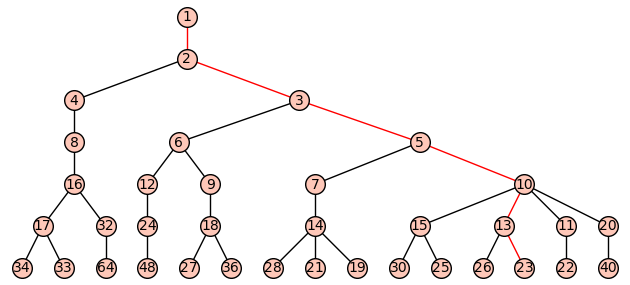

In [97]:
draw_tree(6,23)

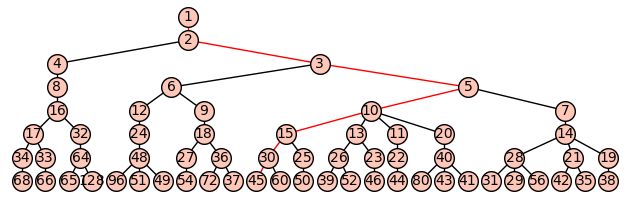

In [98]:
draw_tree(7,45)

Вывод:
Для n = 23 степень может быть найдена за 6 итераций, n = 45 степень может быть найдена за 7 итераций. 
Таким образом, метод дерева степеней лучше бинарного метода возведения в степень SX и метода возведения в степень справа налево. При сравнении с методом множителей для n = 45 получается одинаковое количество итераций, при n = 23, метод дерева степеней лучше на одну итерацию.  

In [99]:
#функция сравнения метода SX и дерева степеней
def tree_vs_SX():
    #построение дерева
    tree=degree_tree(14)
    #рассмотрение всех степеней с 2 по 50
    for i in range(2,50):
        seq=str(Integer(i).binary()[1::])
        if len(find_way(i,tree))-1 <= (seq.count('1')*2+seq.count('0')):
            print("Tree win")
        else:
            print("SX win")
tree_vs_SX()

Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win
Tree win


Результат анализа алгоритмов:
Так как известно, что метод SX  работает за меньшее число итераций, чем метод справа налево, принято решение провести сравнение метода SX и дерева степеней. В результате проверки 50-ти степеней, выявлено, что дерево степеней работает не хуже метода SX (те количество итераций совпадает или меньше).

## Выводы

В данной работе програмно были реализованы бинарный метод возведения в степень SX, бинарный метод возведения в степень справа налево и дерево степеней. Вручную проделан метод множителей. Наиболее эффективным оказалось дерево степеней. При реализации методов использованы системы компьютерной алгебры SageMath.